In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
path = r'C:\Users\HỒNG NHUNG-PC\Downloads\DA-project-python\2-Time Series Data Analysis\individual_stocks_5yr'
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']
all_data=pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(path+'/'+file)
    all_data = pd.concat([all_data, current_df])
all_data.shape

(4752, 7)

In [74]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


# 1 Analyse closing price of all the stock

In [75]:
tech_list = all_data['Name'].unique()

In [76]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [77]:
## convert date into date/time data
all_data['date'] = pd.to_datetime(all_data['date'])

In [78]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

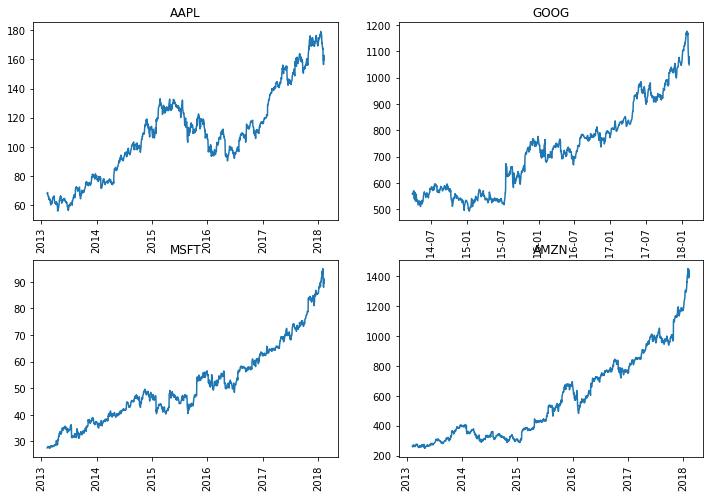

In [79]:
plt.figure(figsize=(12,8))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df = all_data[all_data['Name']==company]
    plt.plot(df['date'], df['close'])
    plt.xticks(rotation = 'vertical')
    plt.title(company)

# 2 Analyse the total volume of stock

In [80]:
import plotly.express as px

In [81]:
for company in tech_list:
    df = all_data[all_data['Name']==company]
    fig = px.line(df, x='date', y='volume', title = company)
    fig.show()

# 3 analyse daily price change in stock

In [82]:
df = pd.read_csv(r'C:\Users\HỒNG NHUNG-PC\Downloads\DA-project-python\2-Time Series Data Analysis\individual_stocks_5yr\AAPL_data.csv')

In [83]:
df['Daily_Price_Change'] = df['close']-df['open']

In [84]:
df['Daily_Price_Change']

0       0.1400
1       0.4900
2      -1.6586
3      -0.0286
4       0.2957
         ...  
1254    0.6150
1255   -5.5000
1256   -2.6100
1257    8.2000
1258   -3.5450
Name: Daily_Price_Change, Length: 1259, dtype: float64

In [85]:
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_Change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [86]:
df['1 day % return'] = (df['close']-df['open'])/df['close']*100

In [87]:
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_Change,1 day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [88]:
    fig = px.line(df, x='date', y='1 day % return', title = company)
    fig.show()

In [89]:
df2 = df.copy()

In [90]:
df2.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily_Price_Change    float64
1 day % return        float64
dtype: object

In [91]:
df2['date']=pd.to_datetime(df2['date'])

In [92]:
df2.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily_Price_Change           float64
1 day % return               float64
dtype: object

In [93]:
df2.set_index(df2['date'],inplace=True)

In [94]:
df2.head()

,date,open,high,low,close,volume,Name,Daily_Price_Change,1 day % return
date,,,,,,,,,
2013-02-08,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


# 4 analyse monthly mean of close feature

<AxesSubplot:xlabel='date'>

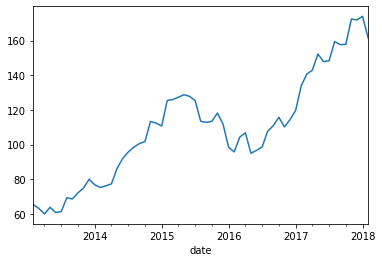

In [95]:
df2['close'].resample('M').mean().plot()

<AxesSubplot:xlabel='date'>

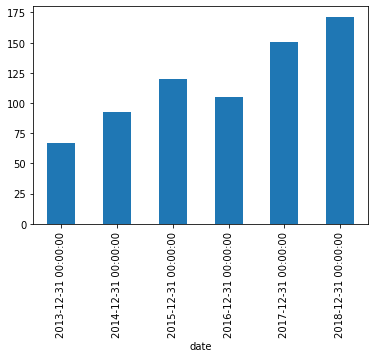

In [96]:
df2['close'].resample('Y').mean().plot(kind='bar')

# 5 analyse whether stock prices of these companies correlated or not

In [97]:
appl_data = pd.read_csv(r'C:\Users\HỒNG NHUNG-PC\Downloads\DA-project-python\2-Time Series Data Analysis\individual_stocks_5yr/AAPL_data.csv')

In [98]:
appl_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [99]:
amzn_data = pd.read_csv(r'C:\Users\HỒNG NHUNG-PC\Downloads\DA-project-python\2-Time Series Data Analysis\individual_stocks_5yr/AMZN_data.csv')
amzn_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [100]:
msft_data = pd.read_csv(r'C:\Users\HỒNG NHUNG-PC\Downloads\DA-project-python\2-Time Series Data Analysis\individual_stocks_5yr/MSFT_data.csv')
msft_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [101]:
goog_data = pd.read_csv(r'C:\Users\HỒNG NHUNG-PC\Downloads\DA-project-python\2-Time Series Data Analysis\individual_stocks_5yr/GOOG_data.csv')
goog_data.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [126]:
close = pd.DataFrame()

In [127]:
close['appl'] = appl_data['close']
close['amzn'] =amzn_data['close']
close['msft'] =msft_data['close']
close['goog'] = goog_data['close']

In [128]:
close.head()

,appl,amzn,msft,goog
0,67.8542,261.95,27.55,558.46
1,68.5614,257.21,27.86,559.99
2,66.8428,258.70,27.88,556.97
3,66.7156,269.47,28.03,567.16
4,66.6556,269.24,28.04,567.00


In [129]:
import seaborn as sns

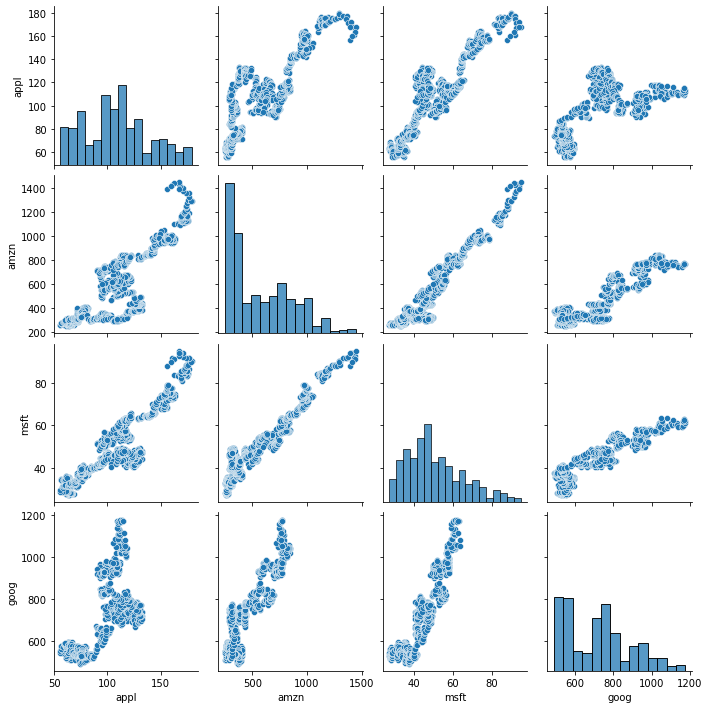

In [130]:
sns.pairplot(data=close)

<AxesSubplot:>

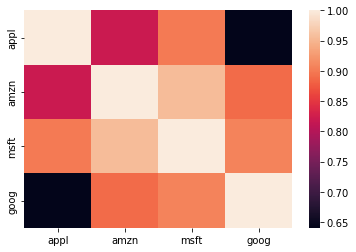

In [131]:
sns.heatmap(close.corr())

# 6 analyse daily return of each stock and how they are co-related

In [132]:
data = pd.DataFrame()

In [135]:
data['appl_change'] = (appl_data['close'] - appl_data['open'])/appl_data['close']*100
data['amzn_change'] = (amzn_data['close'] - amzn_data['open'])/amzn_data['close']*100
data['msft_change'] = (msft_data['close'] - msft_data['open'])/msft_data['close']*100
data['goog_change'] = (goog_data['close'] - goog_data['open'])/goog_data['close']*100

In [136]:
data.head()

,appl_change,amzn_change,msft_change,goog_change
0,0.206325,0.209964,0.725953,-1.708269
1,0.714688,-2.328836,0.753769,-0.216075
2,-2.481344,-0.189409,0.000000,-1.781065
3,-0.042869,2.946525,0.356761,1.489879
4,0.443624,0.694548,0.427960,0.334039


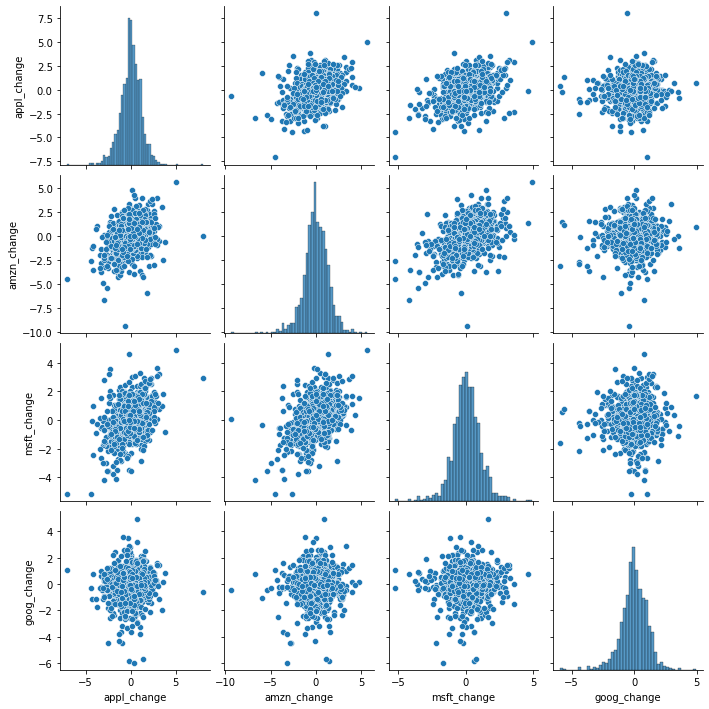

In [137]:
sns.pairplot(data)

<AxesSubplot:>

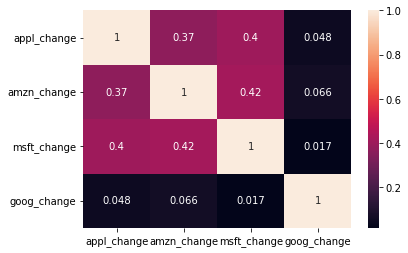

In [139]:
sns.heatmap(data.corr(),annot=True)

# 7 value at risk analysis for Tech companies

D:\Custom Office Templates\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='appl_change', ylabel='Density'>

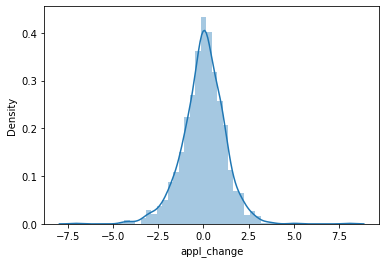

In [141]:
sns.distplot(data['appl_change'])

In [143]:
data['appl_change'].std()
## 68% of entire data

1.1871377131421237

In [145]:
data['appl_change'].std()*2
### 95% of entire data

2.3742754262842474

In [144]:
data['appl_change'].std()*3
#### 99.7% of entire data

3.561413139426371

In [146]:
data['appl_change'].quantile(0.1)

-1.4246644227944307

In [148]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
appl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
msft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
goog_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
